In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# Introduction

This Data Science project is over a couple of datasets. The first dataset consists of the data of all the aircrafts landing at San Francisco form 2002 to 2018. The other dataset consists of the data of all the airplanes and its passenger counts at SF either deplaned, enplaned or through the airport.   

In [38]:
landings=pd.read_csv('air-traffic-landings-statistics.csv')
passengers=pd.read_csv('air-traffic-passenger-statistics.csv')

In [39]:
landings.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,83,16434000
1,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,3,672000
2,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Wide Body,Lockheed,L1011,0,27,9666000
3,200204,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Passenger,Wide Body,Boeing,777,0,9,4139946
4,200204,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Boeing,737,200,5,525000


In [40]:
passengers.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


### Understading the data

In [41]:
landings.dtypes

Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Landing Aircraft Type          object
Aircraft Body Type             object
Aircraft Manufacturer          object
Aircraft Model                 object
Aircraft Version               object
Landing Count                   int64
Total Landed Weight             int64
dtype: object

In [42]:
passengers.dtypes

Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
dtype: object

In [43]:
landings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21846 entries, 0 to 21845
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              21846 non-null  int64 
 1   Operating Airline            21846 non-null  object
 2   Operating Airline IATA Code  21762 non-null  object
 3   Published Airline            21846 non-null  object
 4   Published Airline IATA Code  21762 non-null  object
 5   GEO Summary                  21846 non-null  object
 6   GEO Region                   21846 non-null  object
 7   Landing Aircraft Type        21846 non-null  object
 8   Aircraft Body Type           21846 non-null  object
 9   Aircraft Manufacturer        21836 non-null  object
 10  Aircraft Model               21846 non-null  object
 11  Aircraft Version             20631 non-null  object
 12  Landing Count                21846 non-null  int64 
 13  Total Landed Weight          21

In [44]:
# null values per column
landings.isnull().sum()

Activity Period                   0
Operating Airline                 0
Operating Airline IATA Code      84
Published Airline                 0
Published Airline IATA Code      84
GEO Summary                       0
GEO Region                        0
Landing Aircraft Type             0
Aircraft Body Type                0
Aircraft Manufacturer            10
Aircraft Model                    0
Aircraft Version               1215
Landing Count                     0
Total Landed Weight               0
dtype: int64

In [45]:
landings['Aircraft Version'].replace(np.nan,0,inplace=True)

In [46]:
landings.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    84
Published Airline               0
Published Airline IATA Code    84
GEO Summary                     0
GEO Region                      0
Landing Aircraft Type           0
Aircraft Body Type              0
Aircraft Manufacturer          10
Aircraft Model                  0
Aircraft Version                0
Landing Count                   0
Total Landed Weight             0
dtype: int64

In [47]:
landings['Aircraft Manufacturer'].replace(np.nan,landings['Aircraft Manufacturer'].value_counts().idxmax(),inplace=True)

In [48]:
landings.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,83,16434000
1,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,3,672000
2,200204,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Wide Body,Lockheed,L1011,0,27,9666000
3,200204,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Passenger,Wide Body,Boeing,777,0,9,4139946
4,200204,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Boeing,737,200,5,525000


In [49]:
landings['Aircraft Manufacturer'].value_counts()

Aircraft Manufacturer
Boeing               13170
Airbus                5534
Bombardier            1158
McDonnell Douglas      906
Embraer                665
Beechcraft             164
Shorts                  70
Fairchild               59
DeHavilland             41
Cessna                  26
LearJet                 18
Swearingen              13
Piper                    9
Lockheed                 7
BAE-Avro                 6
Name: count, dtype: int64

In [50]:
# unique values
landings['Aircraft Manufacturer'].values

array(['Boeing', 'Boeing', 'Lockheed', ..., 'Boeing', 'Boeing', 'Airbus'],
      dtype=object)

In [51]:
numerical_values = list(landings.select_dtypes(include='int').columns)
numerical_values

['Activity Period', 'Landing Count', 'Total Landed Weight']

In [52]:
df = landings[['Activity Period', 'Landing Count', 'Total Landed Weight']]

In [53]:
landings.shape

(21846, 14)

In [54]:
# mpl.pyplot.figure(figsize=(15,15))
# sns.heatmap(df, annot=True)

# Analysis(Landings)

##### 1.  Which airline lands its heaviest planes over a period (2007-2017)
##### 2. Bar graph of the landing count distribution in each year of the airline with most number of international flights
##### 3. Area graph over the context of landing count distribution in years of the top 5 airlines which perform most domestic flights(2007-17)
##### 4. Which is the top aircraft manufacturer which top 5 frighter airlines choose to perform their flights to SF 
##### 5. Which aircraft manufacturer makes a freighter aircraft which can carry more weight than others

In [55]:
#1 
# Airline with most weight
dec_7_17=landings[landings['Activity Period']>200700 ]
dec_7_17=dec_7_17[dec_7_17['Activity Period']<201800]
dec_7_17.groupby("Operating Airline")['Total Landed Weight'].agg('mean').sort_values(ascending=False).head(1)

Operating Airline
Virgin America    5.735168e+07
Name: Total Landed Weight, dtype: float64

Virgin America is the airline which has the highest average landing weight in the decade 2007-2017

In [56]:
virgin=dec_7_17[dec_7_17['Operating Airline']=='Virgin America']
virgin['Activity Period']=virgin['Activity Period'].astype('str')

In [57]:
# virgin.head()
virgin.loc[:, ['Activity Period']]

,Activity Period
3653,200708
3793,200709
3931,200710
3932,200710
4066,200711
...,...
20919,201712
20920,201712
20921,201712
20922,201712


In [58]:
virgin['year']=virgin['Activity Period'].str.slice(0,4)
virgin['year']=virgin['year'].astype('int')
virgin.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight,year
3653,200708,Virgin America,VX,Virgin America,VX,Domestic,US,Passenger,Narrow Body,Airbus,A320,0,179,25453800,2007
3793,200709,Virgin America,VX,Virgin America,VX,Domestic,US,Passenger,Narrow Body,Airbus,A320,0,261,37114200,2007
3931,200710,Virgin America,VX,Virgin America,VX,Domestic,US,Passenger,Narrow Body,Airbus,A319,0,3,413400,2007
3932,200710,Virgin America,VX,Virgin America,VX,Domestic,US,Passenger,Narrow Body,Airbus,A320,0,388,55173600,2007
4066,200711,Virgin America,VX,Virgin America,VX,Domestic,US,Passenger,Narrow Body,Airbus,A319,0,85,11713000,2007


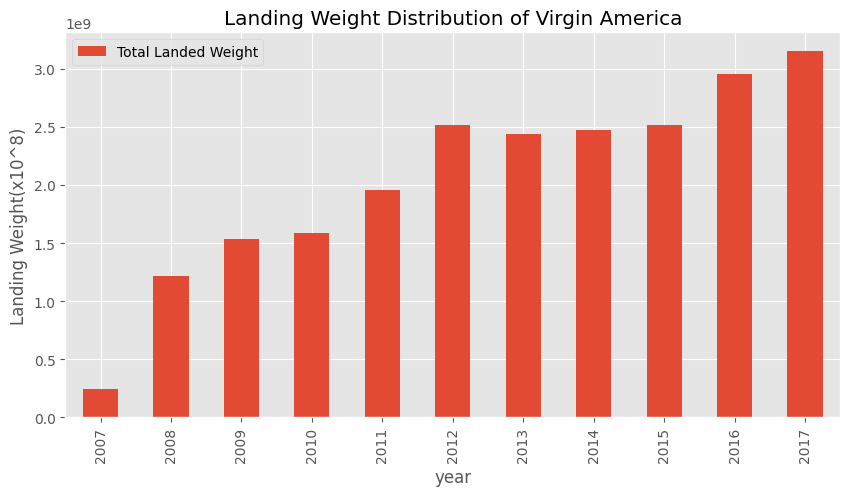

In [59]:
virgin.groupby('year',as_index=False)['Total Landed Weight'].agg('sum').set_index('year').plot(kind='bar',figsize=(10,5))
plt.title('Landing Weight Distribution of Virgin America')
plt.ylabel('Landing Weight(x10^8)')
plt.show()

This graph depicts the rise of Virgin America in San Francisco. It had a great rise in 2012 and ultimately passed the 3x10^8 mark in 2017.

In [60]:
#2 
inter=dec_7_17[dec_7_17['GEO Summary']=='International']
inter.groupby('Operating Airline')['Landing Count'].agg('sum').sort_values(ascending=False).head()

Operating Airline
United Airlines - Pre 07/01/2013    44236
United Airlines                     38976
Air Canada                          34308
SkyWest Airlines                    25105
Alaska Airlines                     10278
Name: Landing Count, dtype: int64

It can be seen that there is some problem with the United Airlines entry. There are two entries: United Airlines and United Airlines Pre 07/01/2013.And both are the airlines with maximum number of landings at SF.

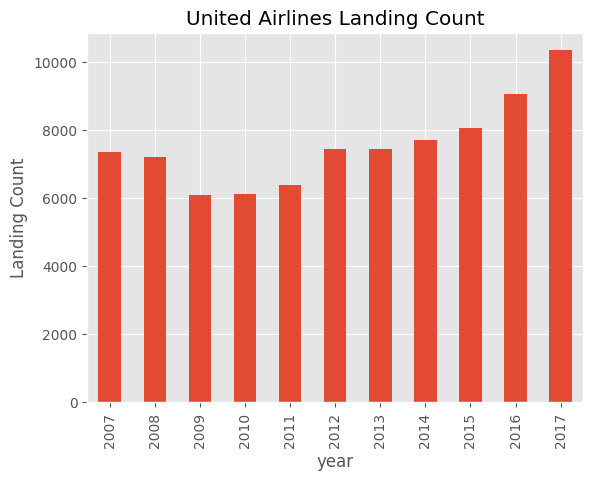

In [61]:
united=inter[(inter['Operating Airline']=='United Airlines') | (inter['Operating Airline']=='United Airlines - Pre 07/01/2013')]
united['Activity Period']=united['Activity Period'].astype('str')
united['year']=united['Activity Period'].str.slice(0,4)
united['year']=united['year'].astype('int')
united.groupby('year')['Landing Count'].agg('sum').plot(kind='bar')
plt.title('United Airlines Landing Count')
plt.ylabel('Landing Count')
plt.show()

United Airlines is the airline which has most number of landings at SF. Its landing count, in the decade 2007 to 2017, is depicted in this graph. Its landing count first decreased till 2009-2010 but continued to increase till 2017 when it crossed the 10000 mark ultimately showing its dominance over other airlines operating at SF.

In [62]:
#3 
top_air=dec_7_17[dec_7_17['GEO Summary']=="Domestic"].groupby('Operating Airline',as_index=False)['Landing Count'].agg('sum').sort_values('Landing Count',ascending=False).reset_index().head()
top_air.head()

,index,Operating Airline,Landing Count
0,35,SkyWest Airlines,463958
1,44,United Airlines,285863
2,45,United Airlines - Pre 07/01/2013,251029
3,47,Virgin America,155329
4,37,Southwest Airlines,151422


These are the top 5 Domestic airlines which perform most landings at SF.

In [63]:
air=list(top_air.drop_duplicates(subset='Operating Airline',keep='last')['Operating Airline'])
top_air=dec_7_17[((dec_7_17['Operating Airline']==air[0])|(dec_7_17['Operating Airline']==air[1])|(dec_7_17['Operating Airline']==air[2])|(dec_7_17['Operating Airline']==air[3])|(dec_7_17['Operating Airline']==air[4]))&(dec_7_17['GEO Summary']=='Domestic')]

In [64]:
top_air['Activity Period']=top_air['Activity Period'].astype('str')
top_air['year']=top_air['Activity Period'].str.slice(0,4)
top_air['year']=top_air['year'].astype('int')

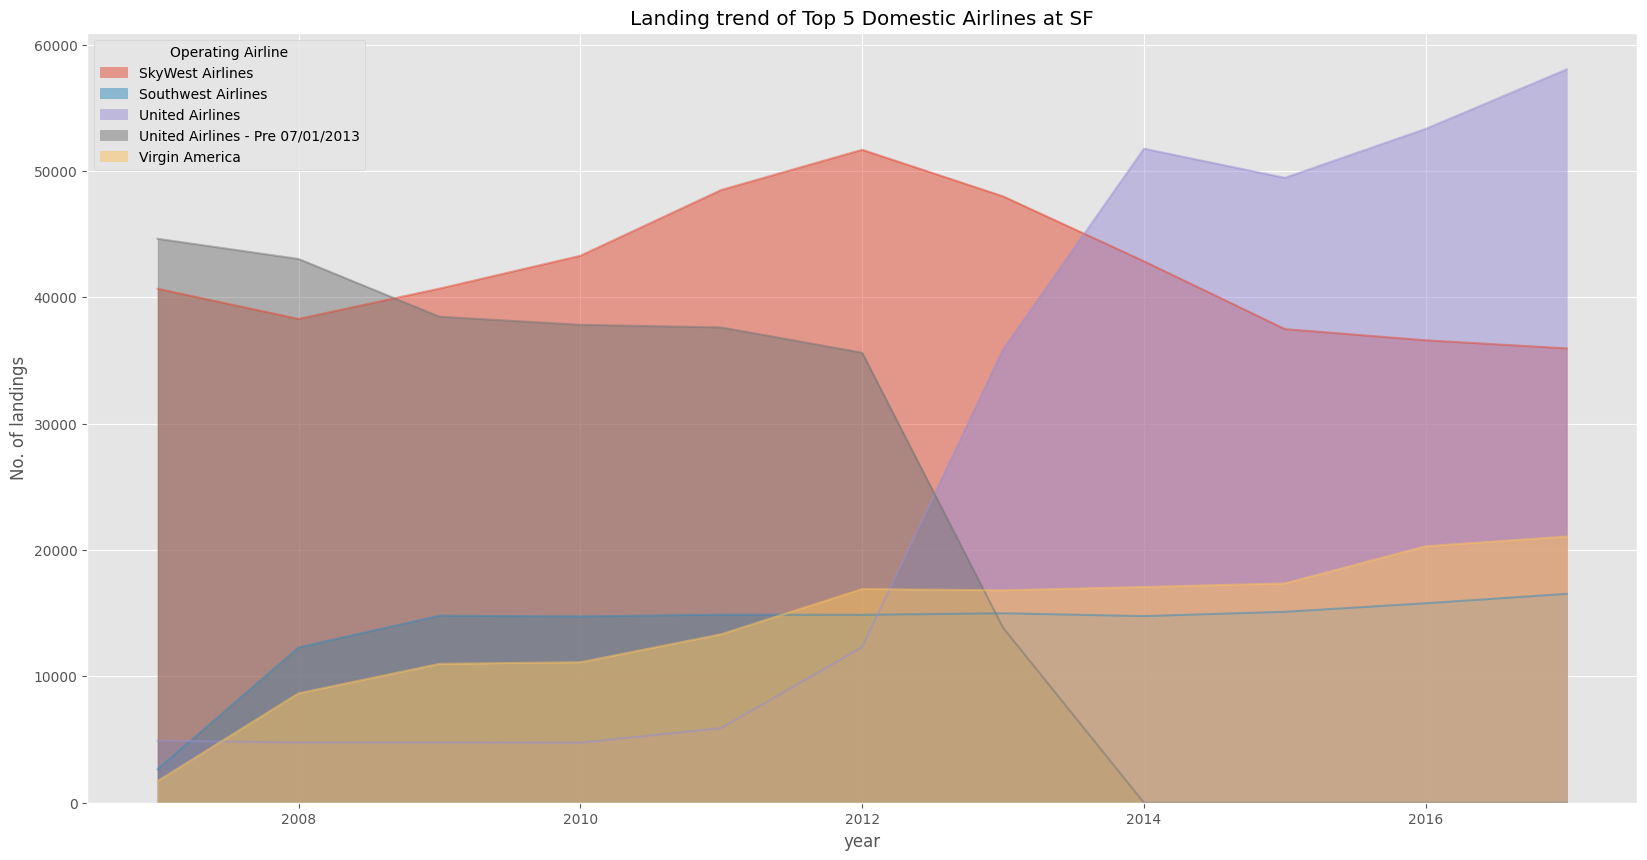

In [65]:
top_air.groupby(['year','Operating Airline'],as_index=False)['Landing Count'].agg('sum').pivot_table(index='Operating Airline',columns='year',values='Landing Count').transpose().plot(kind='area',stacked=False,alpha=0.5,figsize=(20,10))
plt.title('Landing trend of Top 5 Domestic Airlines at SF')
plt.ylabel('No. of landings')
plt.show()

This graph shows that SkyWest Airlines, which is the best Domestic Airline, had its landings maximum in the year 2012. After that it is continuously losing its position. Since there was a problem with the entry of United Airlines, let us consider the pre2013 first and then the actual, to be the continuation of the graph of United Airlines. On analysing, we get that United Airlines is gaining its popularity in SF with growing years and is going to be the number 1 in the upcoming years. While United is busy maintaing its position, Virgin America and Southwest Airlines are fighting their own market. The growing graphs of the former mentioned airlines show that they have tough competition among themselves and are fighting their way out. While Southwest has not seen any growth in its landings in the later part of the decade, Virgin has a very slow rate of growth in every three years. 

In [66]:
#4
top_freighter=dec_7_17[dec_7_17['Landing Aircraft Type']=='Freighter'].groupby('Operating Airline',as_index=False)['Landing Count'].agg('sum').sort_values('Landing Count',ascending=False).head()
top_freighter.head()

,Operating Airline,Landing Count
16,Federal Express,5691
0,ABX Air,5489
22,Korean Air Lines,3904
4,Ameriflight,3814
23,Nippon Cargo Airlines,3381


Federal Express is the top freighter airline followed by ABX Air and so on.

In [67]:
dec_7_17[(dec_7_17['Operating Airline']=='Federal Express')|(dec_7_17['Operating Airline']=='ABX Air')|(dec_7_17['Operating Airline']=='Korean Air Lines')|(dec_7_17['Operating Airline']=='Nippon Cargo Airlines')|(dec_7_17['Operating Airline']=='Ameriflight')].groupby(['Operating Airline','Aircraft Manufacturer'],as_index=False)['Landing Count'].agg('count').head(10)

,Operating Airline,Aircraft Manufacturer,Landing Count
0,ABX Air,Boeing,114
1,ABX Air,McDonnell Douglas,26
2,Ameriflight,BAE-Avro,4
3,Ameriflight,Beechcraft,164
4,Ameriflight,Fairchild,59
5,Ameriflight,LearJet,11
6,Ameriflight,Piper,6
7,Federal Express,Airbus,177
8,Federal Express,Boeing,26
9,Federal Express,McDonnell Douglas,174


Looks like the leader: Federal Express prefers Airbus and McDonnell Douglas while Korean Airlines and Nippon Cargo Airlines believe in Boeing. ABX Air also belives in Boeing. Sice Ameriflight is a small cargo airline ar SF, buying Boeing cargo planes are not possible for it. That's why it uses Beechcraft more, which is a small aircraft. 

In [68]:

dec_7_17[dec_7_17['Landing Aircraft Type']=='Freighter'].groupby('Aircraft Manufacturer')['Total Landed Weight'].agg('sum').sort_values(ascending=False).head(10)

Aircraft Manufacturer
Boeing               12955682215
McDonnell Douglas     1609811490
Airbus                 498999470
Shorts                  37622000
Beechcraft              30624280
Fairchild               20846000
Cessna                   3281000
LearJet                   260100
Piper                      67500
BAE-Avro                   62500
Name: Total Landed Weight, dtype: int64

Looks like Boeing is the company which manufactures aircrafts which carries more weight than other companies' aircrafts.

In [69]:
# Let us find which aircraft of Boeing carries the most weight
dec_7_17[(dec_7_17['Aircraft Manufacturer']=="Boeing")&(dec_7_17['Landing Aircraft Type']=='Freighter')].groupby(['Aircraft Model','Aircraft Version'],as_index=False)['Total Landed Weight'].agg('sum').sort_values('Total Landed Weight',ascending=False).head(15)

,Aircraft Model,Aircraft Version,Total Landed Weight
14,747,400F,5144785200
16,747,800,1515862970
20,767,-,1347259000
26,B744,-,887627000
9,747,400,875069398
27,B748,-,848518000
6,747,200,632520000
3,747,0,401168000
13,747,400ERF,371557000
29,B762,-,230939000


# Passenger data

In [70]:
passengers.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


# Missing data 

In [71]:
passengers.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

No missing data other than IATA code which is of no use to us.

# Analysis

In [72]:
#1 Bar graph of the total number of passengers travelling through SF in each year in the period(2007-17)
#2 Which Terminal of SF handles maximum passengers over a course of 10years(7-17)(Area graph)
#3 Bar graph comparison of passengers deplaned, enplaned and thru/transit at SF per year(7-17)
#4 Which domestic airline is at its peak in its business per year(7-17)
#5 To which international GEO region do the passengers of SF travel most per year(7-17) and give its distribution of passenger count in heatmap of top 5 airlines

Since all the analysis are to be done in the decade 2007-17, let us slice out the decade from the total data.

In [73]:
pax7_17=passengers[(passengers['Activity Period']>200700) & (passengers['Activity Period']<201800)]
pax7_17.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
2064,200701,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,International,A,48
2065,200701,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,International,A,48
2066,200701,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 3,E,19541
2067,200701,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 3,E,18824
2068,200701,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,4845


In [74]:
# 1
#let us create a column of years
pax7_17['years']=pax7_17['Activity Period'].astype('str').str.slice(0,4)
pax7_17['years']=pax7_17['years'].astype('int')
pax7_17.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,years
2064,200701,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,International,A,48,2007
2065,200701,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,International,A,48,2007
2066,200701,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 3,E,19541,2007
2067,200701,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 3,E,18824,2007
2068,200701,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,4845,2007


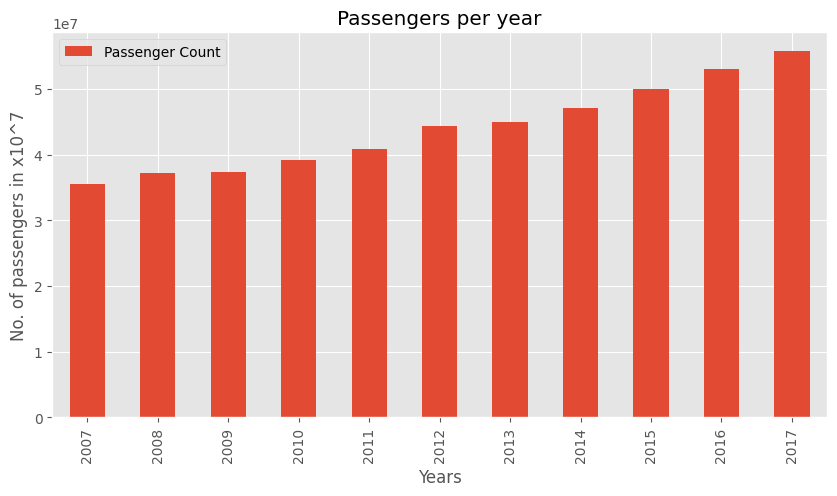

In [75]:
pax7_17.groupby('years',as_index=False)['Passenger Count'].agg('sum').set_index('years').plot(kind='bar',figsize=(10,5))
plt.title('Passengers per year')
plt.ylabel('No. of passengers in x10^7')
plt.xlabel('Years')
plt.show()

As it can be visualized from the graph that at 2007 the passenger count was around 35 million and it slowly increased as the decade proceeded and touched the 50 million mark in 2015 and is soon going to get to 60 million in either the end of 2018 or mid 2019.  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


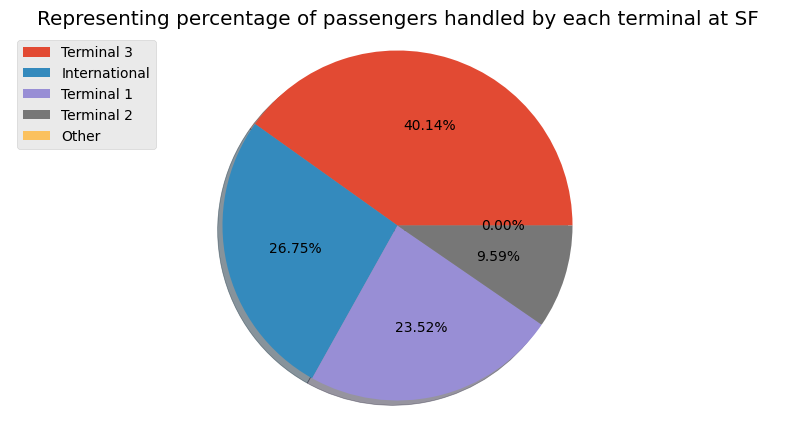

In [76]:
# 2
terminals=passengers.groupby('Terminal',as_index=False)['Passenger Count'].agg('sum').set_index('Terminal').sort_values('Passenger Count',ascending=False)
terminals.plot(kind='pie',figsize=(10,5),autopct='%1.2f%%',subplots=True,labels=None,shadow=True)
plt.title('Representing percentage of passengers handled by each terminal at SF')
plt.ylabel('')
plt.axis('equal')
plt.legend(labels=terminals.index,loc='upper left')
plt.show()

Terminal3 handles almost 40% of the passengers at SF followed by the international terminal, which handles almost 27% of the passengers. The 'others' terminal has a very very low value and might posssibly be the General Aviation Terminal. We will later find out why Terminal3 has such a load.  

In [77]:
# 3
pax=pax7_17.groupby(['years','Activity Type Code'],as_index=False)['Passenger Count'].agg('sum').set_index('years')

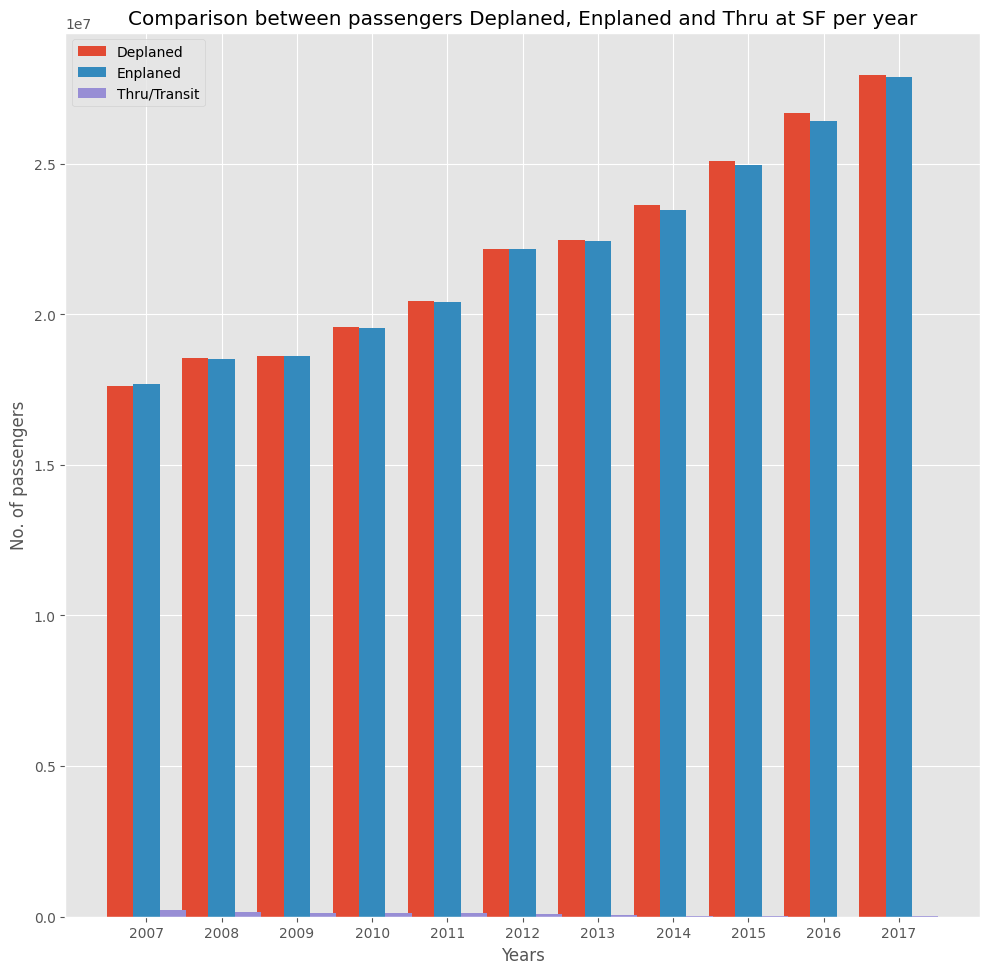

In [78]:
deplaned=pax[pax['Activity Type Code']=='Deplaned']
enplaned=pax[pax['Activity Type Code']=='Enplaned']
thru=pax[pax['Activity Type Code']=='Thru / Transit']
barwidth=0.35
fig,ax=plt.subplots(figsize=(10,10))
p1=plt.bar(deplaned.index,deplaned["Passenger Count"],barwidth,label='Deplaned')
p2=plt.bar(enplaned.index+barwidth,enplaned['Passenger Count'],barwidth,label="Enplaned")
p3=plt.bar(thru.index+(barwidth*2),thru['Passenger Count'],barwidth,label='Thru/Transit')
plt.title('Comparison between passengers Deplaned, Enplaned and Thru at SF per year')
plt.ylabel('No. of passengers')
plt.xlabel('Years')
plt.xticks(deplaned.index+barwidth,deplaned.index)
plt.legend()
plt.tight_layout()
plt.show()

Above graph shows that the number of passengers that deplane and enplane at SF are almost equal. Both of the numbers go on increasing as the years pass by. We see that the passengers that go through SF are almost equal to none. This is because of an intersting fact. In earlier days, as the engines of the airplanes were not so powerful, HUB System was used in Aviation. HUB System simply represents that if any plane has to go from an airport to another airport which are far away from each other, they had to give stops at imtermediate airports due to several reasons. That might be Refueling or other stuff like short maintenence. Now these intermediate airports were big airports like SF. So planes used to get a stop at SF and then continue with its journey, thereby increasing the number of Through passengers at SF. Now a days, HUB System is no longer used as the engines of the planes are pwerful enough to cover long distant flights in one leg. That's why the number of through passengers are continuously decreasing at SF. But you might question that if HUB System is no longer in use, why do passengers(even a small amount) go through SF? Imgaine an airport near to SF but does not have an infrastructure to handle international traffic. Any passenger, trying to reach an international destination has to make a transition through SF( as SF is the only international airport near the small one) to reach his/her destination.     

In [79]:
# 4
#First let us find the airline at SF which rules the domestic passenger service
pax7_17[pax7_17['GEO Summary']=='Domestic'].groupby('Operating Airline',as_index=False)['Passenger Count'].agg('sum').sort_values('Passenger Count',ascending=False).head(6)

,Operating Airline,Passenger Count
30,United Airlines,83749648
31,United Airlines - Pre 07/01/2013,64752856
4,American Airlines,36720763
23,SkyWest Airlines,36035376
32,Virgin America,35271113
24,Southwest Airlines,31559719


It was seen from the other data that Skywest performed most landings at SF but from this data we get that United Airlines(combined) carries maximum number of passengers. This might be because of the bigger airplanes preffered by United which can carry more passengers than Skywest Airlines. But here, American Airlines has occupied the 2nd(virtually) position. The combined score of both the united airlines is way higher than that of other airlines.

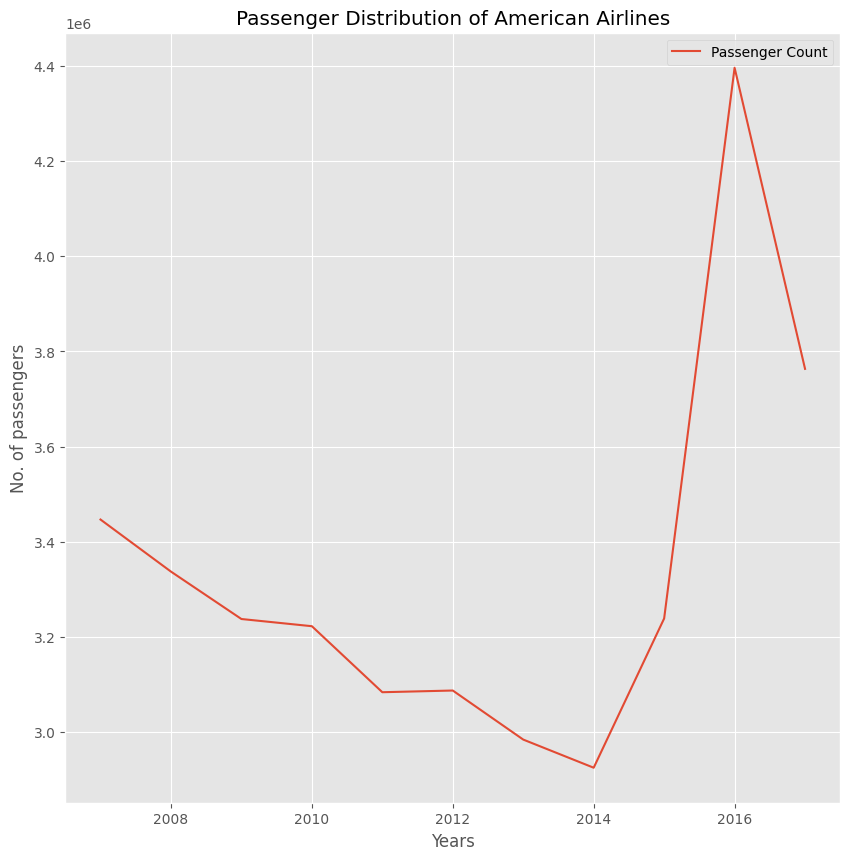

In [80]:
# Passenger distribution of American airlines
domestic=pax7_17[pax7_17['GEO Summary']=='Domestic']
american=domestic[(domestic['Operating Airline']=='American Airlines')]
american.groupby(['Operating Airline','years'],as_index=False)['Passenger Count'].agg('sum').set_index('years').plot(figsize=(10,10))
plt.title('Passenger Distribution of American Airlines')
plt.ylabel('No. of passengers')
plt.xlabel('Years')
plt.show()

It can be visualized from the graph that the business of American Airlines was falling like anything and became least in 2014. Now, it is very interesting to see that the passenger count of American Airlines touched the 4400000 mark from less than 3000000 in a couple of years. It would be really interesting to know what American Airlines did to have such a sudden increase in its business.

In [81]:
# 5
#First lets get the top international destination
pax7_17[pax7_17['GEO Summary']=='International'].groupby('GEO Region',as_index=False)['Passenger Count'].agg('sum').sort_values('Passenger Count',ascending=False).head()

,GEO Region,Passenger Count
0,Asia,47062442
4,Europe,29783590
2,Canada,15017168
5,Mexico,9297433
1,Australia / Oceania,5216849


Asia is the international GEO Region where people travel most from SF

In [82]:
#Lets find the top 5 airlines which carry maximum passengers to Asia.
pax7_17[pax7_17['GEO Region']=='Asia'].groupby('Operating Airline',as_index=False)['Passenger Count'].agg('sum').sort_values('Passenger Count',ascending=False).head(7)

,Operating Airline,Passenger Count
18,United Airlines - Pre 07/01/2013,10307100
17,United Airlines,7823360
4,Cathay Pacific,4904493
15,Singapore Airlines,3779724
9,EVA Airways,3682442
14,Philippine Airlines,2747803
5,China Airlines,2590543


In [83]:
#Since United Airlines has a very peculiar distribution and its count is so much that we cannot overlook it, we will try to rename all United Airlines Pre 7/1/13 to United Airlines
pax7_17['Operating Airline'].replace('United Airlines - Pre 07/01/2013','United Airlines',inplace=True)

In [84]:
pax7_17[pax7_17['GEO Region']=='Asia'].groupby('Operating Airline',as_index=False)['Passenger Count'].agg('sum').sort_values('Passenger Count',ascending=False).head()['Operating Airline']

17        United Airlines
4          Cathay Pacific
15     Singapore Airlines
9             EVA Airways
14    Philippine Airlines
Name: Operating Airline, dtype: object

Therefore we have all the united airlines entry with one name

In [85]:
# now lets find the passenger distribution of these airlines to Asia
international=pax7_17[((pax7_17['Operating Airline']=='United Airlines')|(pax7_17['Operating Airline']=='Cathay Pacific')|(pax7_17['Operating Airline']=='Singapore Airlines')|(pax7_17['Operating Airline']=='EVA Airways')|(pax7_17['Operating Airline']=='Philippine Airlines'))&(pax7_17['GEO Region']=='Asia')]

In [86]:
pivot=international.groupby(['Operating Airline','years'],as_index=False)['Passenger Count'].agg('sum').set_index('years').pivot_table(index='Operating Airline',columns='years',values='Passenger Count')

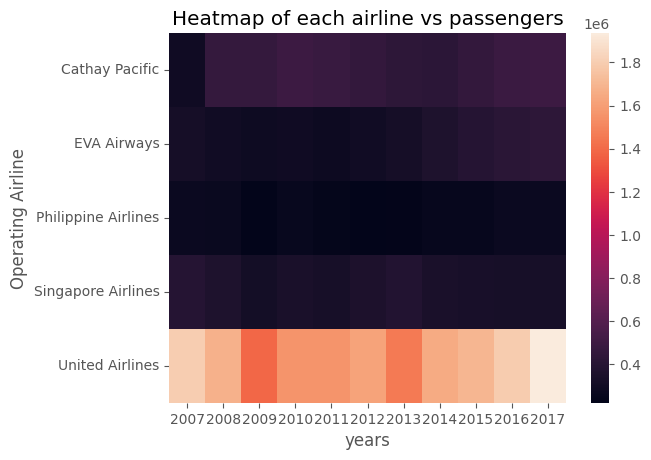

In [87]:
sns.heatmap(pivot)
plt.title('Heatmap of each airline vs passengers')
plt.show()

As seen from earlier that United Airlines rule in Domestic part. Now it can be seen that United Airlines also rules the international market from SF. 
1.We can see that United suffered some downfall in its passenger count in 2009 and 2013 but soon regained its position in the years following that.
2.Cathay Pacific has maintained its consistency in its business throughout the decade, but is facing some downfall now.
3.EVA Airways is rising in the 2nd half of the decade.
4.Phillipine Airlines has not done much business throughout the decade.
5.Singapore Airlines is also struggling to stay in the competition but has suffered a little bit downfall in the passenger count at the end of the decade. 

# Conclusion

From the analysis of both of the datasets we get that Virgin America is the airline which has the highest average landing weight in the decade 2007-2017, United Airlines is the airline which has most number of landings at SF, Landing trend of Top 5 Domestic Airlines at SF, Federal Express is the top freighter airline followed by ABX Air and so on, Federal Express prefers Airbus and McDonnell Douglas while Korean Airlines and Nippon Cargo Airlines believe in Boeing, Boeing is the company which manufactures aircrafts which carries more weight than other companies' aircrafts, Boeing 747 400F can carry a weight way greater than any other airplane,  the passenger count at SF each year, SF's Terminal3 handles most of the traffic, the decrease in the number of through passengers at SF due to the less usage of HUB System in aviation, passenger distribution of American Airlines and the passenger distribution of the top 5 international airlines operating at SF to Asia. United Airlines rule over the domestic and international market in carrying passengers at SF.

# Thank you for having a look at this project